# Data Cleaning and Exploration


## Table of Contents:
1. [Important Information](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Important-Information)
2. [Unpickle the Data](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Unpickle-the-Data)    
3. [Initial Data Exploration](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Initial-Data-Exploration)    
4. [Data Cleaning](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Data-Cleaning)

If some output in this Jupyter notebook doesn't appear, check it out in this [nbviewer](https://nbviewer.org/github/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb).

## Important Information
### Prior to the Creation of this Script:
I have scraped the list of musicians from Wikipedia using wiki_musicians.py.  I manually cleaned the text file to remove double quotations ("") and parentheticals like "(performer)," "(musician)," and "(singer)," since it was manageable with just 111 artists.

I then retrieved lyrics from these artists from Genius.com using lyricsgenius_requests.ipynb, where 70+ artist-queries successfully returned JSON files.

Lastly, I created and pickled the lyrics data frame (or rough_df.pkl, not uploaded in the repo) in the [load_json_to_df.ipynb](https://github.com/Data-Science-for-Linguists-2022/Outsider-Music-Linguistic-Analysis/blob/main/scripts_%26_analysis/2_load_json_to_df.ipynb) script, where an additional 8 artists could not be successfully loaded, due to entirely null lyrical entries.  This pickled data frame remains in my local repository.

The steps above were broken into multiple scripts to avoid re-running time-intensive queries.

### Progress Report Info:
This script represents the end of Progress Report 1 and the main body of Progress Report 2.  PR1 was split into multiple scripts/notebooks so that data collection steps wouldn't be re-run.

## Unpickle the Data

In [1]:
import pickle
f = open('../data/rough_df.pkl', 'rb')
lyricsdf = pickle.load(f)
f.close()

In [2]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,Bring It When You Come Lyrics\nTerrible things...
1,Abner Jay,Cocaine,Cocaine Lyrics\nFolk music is high-class music...
2,Abner Jay,Cocaine Blues,"Cocaine Blues LyricsCocaine, Cocaine\nRunning ..."
3,Abner Jay,Don’t Mess with Me Baby,Don’t Mess with Me Baby Lyrics\nTerrible thing...
4,Abner Jay,I cried,"I cried LyricsI, I cried\nI cried in the ni-ig..."


## Initial Data Exploration
Before cleaning, I'd like to see the status of the data: 
- how many artists are there,
- how many songs,
- how many lyrics are empty strings,
- how many are duplicates,
- and what is the artist distribution like?

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


It looks like there are 3,388 lyric entries, with 63 unique artists. I sense there are a number of "null" lyrics, given that nearly 200 entries are not unique.  This may also be explained by duplicates (though I wouldn't expect exact duplicates for non-null lyrics).

In [5]:
# Find duplicates
len(lyricsdf[lyricsdf.lyrics == ""])

202

In [6]:
lyricsdf.lyrics.duplicated().value_counts()

False    3187
True      201
Name: lyrics, dtype: int64

201 lyric entries are duplicates of other entries, and 202 lyric entries are empty strings.

In [7]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


In [8]:
lyricsdf.artist.value_counts()

Wesley Willis        561
Jandek               351
Daniel Johnston      316
Viper                261
Brian Wilson         237
                    ... 
Mrs. Miller            1
Damião Experiença      1
Varg Vikernes          1
Paul Hawkins           1
Sky Saxon              1
Name: artist, Length: 63, dtype: int64

A good portion of the data is made up of Wesley Willis music (561 songs), while it appears that many artists may only have 1 or 2 songs in the list.  Obviously, this may skew the analysis toward "Wesley Willis" music and away from the more general "Outsider Music" genre.  I will wait until my data is fully cleaned before making any judgments on how to deal with this potential skew.

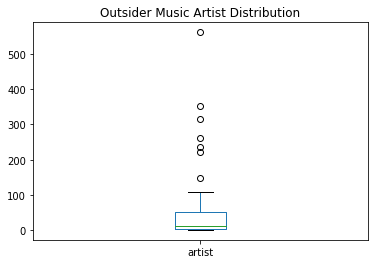

In [9]:
lyricsdf.artist.value_counts().plot(kind = "box", rot=0, title = "Outsider Music Artist Distribution")

This box plot is probably the cleanest way to visualize the artist distribution: there are many artists with only 1 or so songs in the data, as shown by the incredibly cramped 2nd quartile.  But there are also a handful of outliers with hundreds of songs present in the data.

## Data Cleaning

**Progress Report 2 starts here**

As I move forward with data cleaning, I will need to first take care of the "*Song Title* Lyrics" issue present at the beginning of most (if not all) of the lyrics in the dataset, then strip whitespace from the ends of the lyric text and handle "\n" within the lyric body.  I had previously considered changing empty strings in the lyrics to be "None," but that appears to drastically change the lyrics somehow (it copies lyrics from another song into an empty string, but I'm not sure why).  When removing blank songs, we'll just search for empty strings.

In [10]:
# cycles through rows, removes the *Song Title* Lyrics from beginning
def removeTitle(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        toRemove = row.title + " Lyrics"
        row.lyrics = row.lyrics.replace(toRemove, "")
        i = i+1

In [11]:
removeTitle(lyricsdf)

In [12]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"\nTerrible things, always happening\nJust like..."
1,Abner Jay,Cocaine,\nFolk music is high-class music. There's a lo...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,\nTerrible things; that's what's getting all t...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


Note below that there are still duplicates.  After removing the song titles, lyrical entries like "Transcription in progress" and "Embed" are now identical, in addition to the None values added in.  It is difficult to tell, however, why some of these other entries are appearing as duplicates

In [13]:
lyricsdf[lyricsdf.lyrics.duplicated()].tail(20)

,artist,title,lyrics
23,The Red Krayola,Piece for Piano and Guitar,
33,The Red Krayola,The Jewels of thre Madonna,Neevr let it be said that this is swill\nI'm g...
36,The Red Krayola,Tina’s Gone to Have a Baby,The master tours the garden in a coach\nI see ...
10,The Shaggs,Shaggs’ Own Thing (Musical Version),
17,The Shaggs,Wheels,
1,Tonetta,81 Inch Prime Ass (Tonetta),I'm going to tickle your ass\nWith my tongue\n...
79,Viper,"Hop It, Drop It","\nHop it, drop it\nDon't hurt it, work it\nHop..."
113,Viper,In the Life of the Top-Choice Assassin,"\nIn the life of a baller\nShot-caller, hater ..."
127,Viper,Jackers Mad,Transcription in progress by Viper Crackpostin...
156,Viper,No 1 Had A Clue,\nGirls love me cause I'm so real\nCause I'm l...


In [14]:
# strip whitespace from the beginning and end
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.strip("\n"))

In [15]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


In [16]:
# I noticed that .loc[] worked on indexes the restart for individual artists.  This doesn't seem super useful.
lyricsdf.loc[46]

,artist,title,lyrics
46,Ariel Pink,Function,What's the function of your soul\nWhat's the f...
46,Brian Wilson,Dream Angel,I'm holding you as you sleep\nI get this feeli...
46,Daniel Johnston,Despair Came Knocking,Despair came knocking at my door\nAnd I let he...
46,Gary Wilson,Lonely Holiday (Intro),Holiday\nA holiday\nIt's a holidayEmbed
46,Hasil Adkins,Woke Up This Morning,I got up this morning\nYeah when I woke up thi...
46,IceJJFish,So Sweet,Baby you look so sweet\nBaby girl put that bod...
46,Jandek,Comedy,Here's looking at you kid\nYou got the German ...
46,John Frusciante,Dying (I Don’t Mind),Here's one for the unknown past\nShooting into...
46,John Maus,Love Letters From Hell (2007),"Well I'm fillin in for Gracie Roberts tonight,..."
46,Moondog,Oboe Round,


In [17]:
# fix the indexing -- it probably won't be super useful to have each individual musician's songs
# indexed from 0-n.  This makes sure everything has a unique index
lyricsdf = lyricsdf.reset_index()
lyricsdf = lyricsdf[['artist', 'title', 'lyrics']]
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried\nI cried in the ni-ight\nOh please ..."


In [18]:
lyricsdf.tail()

,artist,title,lyrics
3383,William Shatner,Together,He says Phoenix\nPegasus\nGrecian urn\nMidwest...
3384,William Shatner,Twilight Zone,(Somewhere in a lonely hotel room\nThere's a g...
3385,William Shatner,Walking on the Moon,Giant steps are what you take\nI hope my legs ...
3386,William Shatner,What Have You Done,She was underwater\nIn the shadows\nWas it the...
3387,William Shatner,You’ll Have Time,"Live life, live life like you're gonna die\nBe..."


In [19]:
# William Shatner "You'll Have Time" ends in "2Embed"
lyricsdf.iloc[-1].lyrics[-50:]

' airplane crash\nCar wreck, a cap in your ass2Embed'

In [20]:
# Randomly samples from lyrics & shows ending, check what "Embed"s look like
embedtest = lyricsdf.lyrics.sample(5)
for lyrics in embedtest:
    print(lyrics[-50:])

fun at all

That song is about Premarital SexEmbed
sk him why
She was my girl
But now she's goneEmbed
on
Rock on, Chicago
Choosy mothers choose JifEmbed
desperate man, desperate
I’m a desperate man4Embed
round
Y-m-c-a ... just go to the y-m-c-a
....Embed


After running the code chunk above multiple times, I've seen a few features of the "Embed" issue at the tail of the lyrics:
- No space before "Embed"
- Occasionally (but rarely), there is a digit before (e.g., "1Embed")
    - After checking some lyrics on the Genius site, I found that this number corresponds to the "PYONG"s on the lyrics.  This is sort of like a favoriting/sharing function, but for now, it's sort of unimportant.
    
Both the "Embed" and the preceding digit, if present, should be removed.  There is some risk that removing the digit will delete a digit at the end of the lyrics, but I judge that, in this case, losing a digit is preferable to including extraneous data.


In [21]:
# Remove the nEmbed using a regex
def removeEmbed(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        embed = row.lyrics
        row.lyrics = re.sub(r'\d*Embed', "", embed)
        #print(row.lyrics[-50:])
        i = i+1

In [22]:
removeEmbed(lyricsdf)

In [23]:
# replaces newlines with spaces, but maintains the line-break data in a separate column
lyricsdf["lyrics_lines"] = lyricsdf.lyrics
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\n", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ..."


In [24]:
# The end is looking pretty good, too! No Embed, no newlines
for lyrics in lyricsdf.lyrics[:5]:
    print(lyrics[-50:])

it with you, honey Bring it with you when you come
heart And it runnin', oh it runnin' Round my brain
nd then running Lord, it's running Round my brain 
with me baby And I declare, I declare I am through
back tonight And then I'll kiss and hold you tight


Some lyrics are not in English characters.  While sampling, I saw at least one song written in Japanese characters.  I'll tag these in a separate "English_char" column, but won't remove them for now.  There is the possibility that there are foreign language songs written in English characters that won't be recognized by this step.  Given the nature of the data, I sense there may also be some "non-English" nonsense songs.  I'll leave these in, as well, and will leave them untagged (for now), under the assumption that they do not make up a good portion of the data.

In [25]:
# This is not English :)
lyricsdf.iloc[1915].lyrics

'En dag när jag gick i en skog Så tappade jag mina byxor Jag märkte det ej Men jag mötte en tjej Och hon tittade så konstigt på mig Men så sa hon hej ... ... Och sen så gick jag hem'

The code below was taken from this [stack overflow page](https://stackoverflow.com/questions/27084617/detect-strings-with-non-english-characters-in-python).  It should identify non-English characters not found in ASCII.

In [26]:
# [1915] is not English for sure
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [27]:
# Good job! That was, indeed, not English :)
isEnglish(lyricsdf.iloc[1915].lyrics)

False

In [28]:
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [29]:
# That's a lot of non-English songs. Hmm...
lyricsdf.eng_chars_only.value_counts()

True     2337
False    1051
Name: eng_chars_only, dtype: int64

In [30]:
# These look pretty English to me.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

3106    This band played at the Metro About 600 people...
2815    God struck me down He did it to me because I w...
2567    My hops They wanna see me gone 'cause of my ho...
2711    This dog is a wild mutt He is a very wild dogg...
2818    You are a rock star You are the greatest one o...
3129    Suck a horse's cock Suck a dog's dick Suck a h...
3200    Dan Woo was wanted by the FBI for armed robber...
539     Who’s that knocking at the door It’s the ghost...
3339    Clouds of guilt Always just the way I'm built ...
3167    Tennessee Tuxedo was wanted by the FBI for arm...
Name: lyrics, dtype: object

In [31]:
# it looks like there are \u2005 characters (they don't appear as anything on the site)
lyricsdf.iloc[3175].lyrics

"This band rocked the Czar bar About 180 people were at the show The rock show was\u2005a\u2005rock 'n roll\u2005experience It was a great knockout  The Dollrods The\u2005Dollrods The Dollrods The Dollrods  The band played it on The band got down like a Magikist They can really rock the nation They can really jam the guitar  The Dollrods The Dollrods The Dollrods The Dollrods  The show was a rock 'n roller The jam session was a big rock 'n roll blast The jam session was kick ass show They can really knock it out The Dollrods The Dollrods The Dollrods The Dollrods  Rock over London, rock on Chicago Diet Pepsi, uh-huh!"

It looks like there may be a different kind of space formatting on some of the lyrics.  We'll replace them the same way the newlines were replaced.

In [32]:
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u2005", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u2005", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [33]:
# Re-run the eng_chars_only column, see if .value_counts() has changed
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.eng_chars_only.value_counts()

True     2630
False     758
Name: eng_chars_only, dtype: int64

The number of songs with non-English characters has gone down significantly, but it's still worth checking to see if there are other whitespace characters (or similar issues) that may be causing over-tagging.

In [34]:
# Uh-oh.  Stil pretty English.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

1879    Det blev kulhål i byxan Och damm i hans säng O...
3152    This band played at the Congress Theater About...
535     I knew a girl at the funeral She said she was ...
1920    Jag sitter på toaletten i en klämma Jag undrar...
3097    Pull out a 38 caliber revolver! Point it at me...
3118    This is a prison for criminals It is a maximum...
3238    Where's my Smith & Wesson? What did you do wit...
1902    Jag mår så illa! Jag mår så illa så jag måste ...
3121    Fire a warning shot! Get ready to hit the targ...
999     The stars in your eyes set my soul on fire You...
Name: lyrics, dtype: object

In [35]:
# Starting to think maybe tagging non-English songs is a bit fruitless
# But that \u2005 space issue was a good catch, at least!
# Another space formatting issue
lyricsdf.iloc[2734].lyrics

"This band played at the Empty Bottle About two hundred fifty people were at the rock show The jam session was perfect The rock 'n roll burned a monkey up  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The band played it on The\u205fband\u205fgot\u205fdown like a\u205fMagikist The crowd roared\u205flike a lion The jam session whooped a llama's ass  Brain Kiss Brain Kiss Brain Kiss Brain Kiss  The show was over A lot of people met the band The rock 'n roll show was awesome It whipped a pony's ass with a belt Brain Kiss Brain Kiss Brain Kiss Brain Kiss  Rock over London, rock on Chicago Radio Shack, you got questions, we got answers"

In [36]:
# Fix the \u205f spacing
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\u205f", " "))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\u205f", " "))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...,Folk music is high-class music. There's a lott...,True
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...,Terrible things; that's what's getting all the...,True
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True


In [37]:
# count decreases, yet again!
lyricsdf["eng_chars_only"] = lyricsdf.lyrics.map(lambda x: isEnglish(x))
lyricsdf.eng_chars_only.value_counts()

True     2835
False     553
Name: eng_chars_only, dtype: int64

In [38]:
# Catching a lot more actual non-English lyrics, so we might be close to catching all of the formatting issues.
nonEng = lyricsdf[lyricsdf.eng_chars_only == False]
nonEng.lyrics.sample(10)

431     Your home is where you're happy It's not where...
1553    One.. two.. Blind your head in catastrophes Ic...
1904    Klockan är kvart i fem Jag vill gå hem Jag vil...
1889    Du känner Kalle som skjuter höns Och Skånes få...
1917    Jag mötte dig i hamnen Du hade ramlat i Jag to...
1848    What’s the most exciting thing about life? Eit...
1866    Now I don't know nothing or nobody And I don't...
468     Easy to love Easy to bleed Easy enough To sow ...
1900    Du har mat i din mage Du har pengar på din ban...
2334    Who are these men from your Middle America The...
Name: lyrics, dtype: object

In [39]:
lyricsdf.iloc[1795].lyrics

'High on a rocky ledge lives a mädel, Edelweiß Shy as a shadow, lovely as lace, and cold as ice High on a rocky ledge, I pledge my love to her Ev\'ry time I climb up to Paradise How many times I\'ve been up to see her, goodness knows Huffing and puffing, dressed in the warmest climbing clothes How many chances would be taken in my Hopeless pursuit of the Schnee-Mädel-Edelweiß Then spoke a spirit, "If you would win your Lady Love There\'s only one way: fall to your death from high above You will begin to grow in snow beside the one You have waited for to be mated with" Now, I\'m an Edel, vice to my Mädel, Edelweiß Dying to be with her wasn\'t any sacrifice We\'re so deliriously happy on our ledge Where I pledge my love to my Lady Fair You who are climbing breathless to see me and my love Snow flowers growing fonder on Lover\'s Ledge above If you\'ve the yen to pluck, then pluck us both For we who have lived as one wish to die as one'

Note that the straight apostrophe (') is being escaped here.  In other lyrics, the apostrophe is formatted as the curly ’.  I will try standardizing the apostrophe to the curly version below.

In [40]:
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("\'", "’"))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("\'", "’"))
lyricsdf.iloc[1795].lyrics

'High on a rocky ledge lives a mädel, Edelweiß Shy as a shadow, lovely as lace, and cold as ice High on a rocky ledge, I pledge my love to her Ev’ry time I climb up to Paradise How many times I’ve been up to see her, goodness knows Huffing and puffing, dressed in the warmest climbing clothes How many chances would be taken in my Hopeless pursuit of the Schnee-Mädel-Edelweiß Then spoke a spirit, "If you would win your Lady Love There’s only one way: fall to your death from high above You will begin to grow in snow beside the one You have waited for to be mated with" Now, I’m an Edel, vice to my Mädel, Edelweiß Dying to be with her wasn’t any sacrifice We’re so deliriously happy on our ledge Where I pledge my love to my Lady Fair You who are climbing breathless to see me and my love Snow flowers growing fonder on Lover’s Ledge above If you’ve the yen to pluck, then pluck us both For we who have lived as one wish to die as one'

In [41]:
# the ellipsis here is specially formatted as "…"
lyricsdf.iloc[2522].lyrics

'To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome  Don’t get sent home In a body bag for not leaving me alone I don’t care what you got goin on Cuz i already paid and my body is every bone Yea i know, that I’m conceited and arrogant And that can be repeated But that’s just my personality And it’s magnified cuz im a G So i ain’t trying to hear what they gotta say Like they ? for a jack, so i ? the gun spray These marks are fucking up my day Rollin up asking if they may Ask me a question about some bullshit Bitch ass nigga you better get a grip I’m tired of playing with these faggots I’m bout to get my four and let you snitch niggas have it To yo dome with the chrome To yo dome with the chrome To yo dome with the chro

In [42]:
# replace special ellipsis with plain "..."
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.replace("…", "..."))
lyricsdf.lyrics_lines = lyricsdf.lyrics_lines.map(lambda x: x.replace("…", "..."))
lyricsdf.iloc[2522].lyrics[-400:-200]

'ck on a mission But wondering when this green gon’ stop coming in I’ll go... To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with the chrome To yo dome with'

I'm going to search the lyrics for "\\" to see if there are any other formatting issues present.

In [43]:
# It look like there are not "\" formatting issues left
i=0
while i != len(lyricsdf):
    x = re.findall(r"\\", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

From earlier, I remember seeing "Transcription in progress ..." lyric entries.  I'd like to set these as null.

In [44]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"transcription", lyricsdf.lyrics[i], re.IGNORECASE)
    if x: print(x)
    i = i+1

['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']
['Transcription']


In [45]:
# There are 6! and they all appear to say "Transcription in progress"
i=0
transcript_del = []
while i != len(lyricsdf):
    if "Transcription in progress" in lyricsdf.iloc[i].lyrics:
        transcript_del.append(i)
    i= i+1

In [46]:
for i in transcript_del:
    print(lyricsdf.iloc[i].lyrics)

Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins
Transcription in progress by Viper Crackposting admins


In [47]:
# They're all the same string, so:
lyricsdf.lyrics = lyricsdf.lyrics.replace("Transcription in progress by Viper Crackposting admins", None)

In [48]:
i=0
while i != len(lyricsdf):
    x = re.findall(r"Transcription", lyricsdf.lyrics[i])
    if x: print(x)
    i = i+1

Because some English songs contain non-English characters, the eng_chars_only column isn't very useful at the moment.  However, it did help significantly with catching other formatting issues that I had not anticipated.  I will consider the data clean for the moment.

Note, also, that the data remains very Zipfian in terms of artists.  For now, I will leave it as such.  As a disclaimer, the Wesley Willis skew sort of represents the "poster child" of outsider music, so the analysis may feed into the ideology surrounding the genre.

In [49]:
# returns % of characters that are non-English
def nonEngChars(s):
    i = 0  # counter for non-Eng chars
    for c in s:  # iterate through string
        try:
            c.encode(encoding='utf-8').decode('ascii')
        except UnicodeDecodeError:
            i+=1  # increment if char causes error
    if len(s) > 0:
        return i/len(s)
    else:
        return np.nan

In [50]:
# [1915] is not English for sure
nonEngChars(lyricsdf.iloc[1915].lyrics)

0.044444444444444446

In [51]:
lyricsdf["percent_non_english"] = lyricsdf.lyrics.map(lambda x: nonEngChars(x))
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902


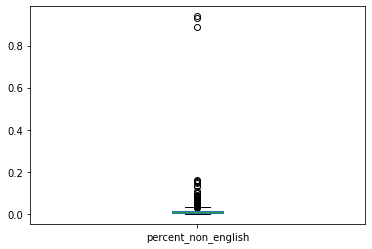

In [52]:
# Looks like a good number are on the low end, but some are on the higher end.
# Potentially missing lyric data!
lyricsdf.percent_non_english.plot(kind='box')
plt.show()

In [53]:
# These look pretty English to me.
nonEng = lyricsdf[lyricsdf.percent_non_english > 0.08]
nonEng

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english
12,Ajdar,Şahdamar,"Şah şah şah Dam dam dam Ar ar ar Şahdamar, ş...",Şah şah şah\nDam dam dam\nAr ar ar\nŞahdamar...,False,0.089683
43,Ariel Pink,Corazon Que,Corazón qué Corazón qué Corazón qué Corazón ...,Corazón qué\nCorazón qué\nCorazón qué \n\nCora...,False,0.153846
130,Ariel Pink,Red Room,‏‏thginot nwod teG ‏‏thginot nwod teG ‏‏thgino...,‏‏thginot nwod teG\n‏‏thginot nwod teG\n‏‏thgi...,False,0.110372
147,Ariel Pink,Starry Eyes,​raw ot oG,​raw ot oG,False,0.100000
1746,Les Rallizes Dénudés,Enter the Mirror,あらゆる夜（闇）を通り過ぎてきた 時々ひとりで あらゆる闇（夜）を通り過ぎてきた お前といっ...,あらゆる夜（闇）を通り過ぎてきた\n時々ひとりで\nあらゆる闇（夜）を通り過ぎてきた\nお前...,False,0.928571
1748,Les Rallizes Dénudés,The Last One,心の裏側で喜びに震え 生きていることさえ忘れてしまった 僕が１人で歩くのは、だれもいない波の...,心の裏側で喜びに震え 生きていることさえ忘れてしまった\n僕が１人で歩くのは、だれもいない波...,False,0.159120
1749,Les Rallizes Dénudés,White Awakening,パターンA： ----------- 私の春が始まった時 あなただけしか欲しくなかった 風の...,パターンA：\n-----------\n私の春が始まった時 あなただけしか欲しくなかった\...,False,0.888112
1751,Les Rallizes Dénudés,夜、暗殺者の夜 (Night of the Assassins),Japanese (Original) とても深い夜 まるで誰かを殺したみたい 何がお前の飢...,Japanese (Original)\nとても深い夜 まるで誰かを殺したみたい\n何がお前...,False,0.158151
1752,Les Rallizes Dénudés,永遠に今が (Forever is Now),Japanese (Original) いくつもの永遠を横切って いくつもの望みを後にして ...,Japanese (Original)\nいくつもの永遠を横切って\nいくつもの望みを後にし...,False,0.146000
1753,Les Rallizes Dénudés,記憶は遠い,遠い記憶の中にお前を見る 見知らぬ二つの街が通り過ぎる 僕らの周りで海が血に変わる それしか...,遠い記憶の中にお前を見る\n見知らぬ二つの街が通り過ぎる\n僕らの周りで海が血に変わる\nそ...,False,0.938462


In [54]:
# These are indices indicated to be mostly non-English, but it seems the curly apostrophe is just mixing up the encoding
lyricsdf.iloc[2242].lyrics #1800, 1232, 1003, 1989

'Let’s get busy (let’s get busy) Let’s get busy (let’s get busy) Let’s get hot (let’s get hot) Let’s be cool (let’s be cool) Let’s get crooked, let’s get crazy Get it together and let’s get busy  I’m feelin good, let’s have a party I’m on the phone, callin’ my homies Come have some fun, we’ll be jammin’ Bring some food, but don’t bring beer now Bring your pajamas and your boom box We’ll rock the house and dance our socks off  Let’s get busy (let’s get busy) Let’s get busy (let’s get busy) Let’s get hot (let’s get hot) Let’s be cool (let’s be cool) Let’s get crooked, let’s get crazy Get it together and let’s get busy  I’m havin’ fun, eatin’ pizza I see my boyfriend, I see my girlfriend Let’s get up and start dancin’ Make some noise, turn up the music Let’s not stop until we drop Let’s keep goin’ til the break of dawn Let’s get busy (let’s get busy) Let’s get busy (let’s get busy) Let’s get hot (let’s get hot) Let’s be cool (let’s be cool) Let’s get crooked, let’s get crazy Get it togeth

I am going to instead try using a pre-packaged language detector to see if I can weed out the non-English lyrics more definitively.  It seems going based off of encoding isn't ideal, given that symbols like the curly apostrophe can easily mix up the encoding method, and it's difficult to find a cut-off % point.

In [55]:
import spacy

Using the spaCy documentation and this [stack overflow page](https://stackoverflow.com/questions/66712753/how-to-use-languagedetector-from-spacy-langdetect-package), I'll create a new column to store the language detected and the confidence score.

In [56]:
from spacy_langdetect import LanguageDetector
from spacy.language import Language

def get_lang_detector(nlp, name):
    return LanguageDetector()

# This just outputs an example, to show that the detector is working
nlp = spacy.load("en_core_web_sm")
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)
text = 'This is an english text.'
doc = nlp(text)
print(doc._.language)

{'language': 'en', 'score': 0.9999958927364412}


In [57]:
def langDetect(nlp, text):
    doc = nlp(text)
    return doc._.language

lyricsdf["lang_detect"] = lyricsdf.lyrics.map(lambda x: langDetect(nlp, x))

In [58]:
lyricsdf.head()

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918,"{'language': 'en', 'score': 0.9999942383770333}"
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657,"{'language': 'en', 'score': 0.9999965215382666}"
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551,"{'language': 'en', 'score': 0.9999972912349995}"
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326,"{'language': 'en', 'score': 0.9999981641683633}"
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902,"{'language': 'en', 'score': 0.9999968060450811}"


In [59]:
# lang_detect is a short dictionary, containing 'language' and 'score' as keys
# extract 'language'

lyricsdf["lang"] = lyricsdf.lang_detect.map(lambda x: x["language"])

In [60]:
lyricsdf.lang.value_counts()

en         3048
UNKNOWN     224
sv           60
so            7
fr            7
tl            6
id            5
tr            3
es            3
af            3
ca            3
ja            3
no            3
nl            2
cy            2
sk            2
it            2
sw            2
pl            1
pt            1
hr            1
Name: lang, dtype: int64

In [61]:
non_eng = lyricsdf[lyricsdf.lang != "en"]
non_eng.sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang
355,Brian Wilson,Sketches Of Smile,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
516,Daniel Johnston,Excuse Me,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
1882,Philemon Arthur And The Dung,Djurvännen,"Kom, ska vi plocka smultron Kom, ska vi plocka...","Kom, ska vi plocka smultron\nKom, ska vi plock...",False,0.007892,"{'language': 'sv', 'score': 0.9999968721872502}",sv
1996,R. Stevie Moore,Melbourne,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
1893,Philemon Arthur And The Dung,Får Jag Spy?,Jag känner mig väldigt dålig Så konstig och my...,Jag känner mig väldigt dålig\nSå konstig och m...,False,0.050000,"{'language': 'sv', 'score': 0.9999957041980194}",sv


In [62]:
lyricsdf[lyricsdf.lang == "en"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang
2240,The Kids of Widney High,Hollywood,I can see the stars on the boulevard I can see...,I can see the stars on the boulevard\nI can se...,True,0.014006,"{'language': 'en', 'score': 0.9999953076309854}",en
1514,John Frusciante,Singular Scope 85,"I don’t know but I’ve been told, A way is away...","I don’t know but I’ve been told,\nA way is awa...",True,0.033241,"{'language': 'en', 'score': 0.9999971808219347}",en
139,Ariel Pink,Sexual Athletics,"(Scat style) Do-do the walk, ai-ee-ya Do-do-do...","(Scat style)\nDo-do the walk, ai-ee-ya\nDo-do-...",True,0.018116,"{'language': 'en', 'score': 0.9999986243799583}",en
1191,Jandek,Know Thy Self,You think I got time for you? You’re just some...,You think I got time for you?\nYou’re just som...,True,0.015915,"{'language': 'en', 'score': 0.9999975264946225}",en
1423,John Frusciante,Fallout (Alternative Version),Carried through the road so far alone Days glu...,Carried through the road so far alone\nDays gl...,True,0.003559,"{'language': 'en', 'score': 0.9999954839735261}",en


In [63]:
# Check some of the less frequent languages
lyricsdf[lyricsdf.lang.isin(['ja', 'no', 'es', 'nl', 'tr', 'sw', 'it', 'ca', 'et', 'pt', 'pl', 'sl', 'sk', 'hr'])].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang
12,Ajdar,Şahdamar,"Şah şah şah Dam dam dam Ar ar ar Şahdamar, ş...",Şah şah şah\nDam dam dam\nAr ar ar\nŞahdamar...,False,0.089683,"{'language': 'tr', 'score': 0.999998688609355}",tr
1437,John Frusciante,Guitar,"Uh, uh Move your body like Uh Like Uh, uh Move...","Uh, uh\nMove your body like\nUh\nLike\nUh, uh\...",True,0.000000,"{'language': 'sk', 'score': 0.42857014169863616}",sk
11,Ajdar,Çikita Muz,Şurup gibiyim şurup Turp gibiyim turp turp Ben...,Şurup gibiyim şurup\nTurp gibiyim turp turp\nB...,False,0.075843,"{'language': 'tr', 'score': 0.9999965512994088}",tr
129,Ariel Pink,Ramaya,"Right! (Woo!) Bokuko ramaya, bokuko (Woo!) ...","Right!\n\n(Woo!)\n\nBokuko ramaya, bokuko\n\n(...",True,0.000000,"{'language': 'sw', 'score': 0.5714286788736566}",sw
1241,Jandek,Oh No,"Ooh Oh no, oh no","Ooh\nOh no, oh no",True,0.000000,"{'language': 'sk', 'score': 0.8265520572079647}",sk


In [64]:
# Check out some of the more frequent languages:
lyricsdf[lyricsdf.lang.isin(['fr', 'so', 'tl', 'id', 'cy', 'af'])].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang
195,Brian Wilson,Barbara Ann,Ba ba ba ba Barbara Ann Ba ba ba ba Barbara An...,Ba ba ba ba Barbara Ann\nBa ba ba ba Barbara A...,True,0.022901,"{'language': 'id', 'score': 0.9999956304631636}",id
1304,Jandek,Sung,I’m looking at a blank page Looking at a blank...,I’m looking at a blank page\nLooking at a blan...,False,0.028037,"{'language': 'tl', 'score': 0.7142808875298754}",tl
1090,Jandek,Echo,Won’t you get along Won’t you get along Won’t ...,Won’t you get along\nWon’t you get along\nWon’...,True,0.050314,"{'language': 'tl', 'score': 0.5714266029774046}",tl
1165,Jandek,I See Lights,I see red lights I see green lights,I see red lights\nI see green lights,True,0.000000,"{'language': 'af', 'score': 0.7142827444409375}",af
548,Daniel Johnston,Go Some More,"Go, go! Go, go! Go, go! Go, go, go! Go, go! Go!","Go, go!\nGo, go!\nGo, go!\nGo, go, go!\nGo, go...",True,0.000000,"{'language': 'so', 'score': 0.9999951523490662}",so


The above lists are samples, but I've skimmed through the full non-English lists. Note that this isn't a perfect solution.  Many English lyrics have been misidentified as foreign languages, as shown below with "Deck the Halls."  It appears that too many "la"s has classified this one as Spanish.  However, it's easier to trust that the remaining data is, indeed, English, which could be worth the loss of some data.

In [65]:
print("language:", lyricsdf.iloc[223].lang, "\n", lyricsdf.iloc[223].lyrics)

language: es 
 Deck the halls with boughs of holly Fa, la, la, la, la, la, la, la, la ’Tis the season to be jolly Fa, la, la, la, la, la, la, la, la Don we now our gay apparel Fa, la, la, la, la, la, la, la, la Troll the ancient Yule tide carol Fa, la, la, la, la, la, la, la, la See the blazing Yule before us Fa, la, la, la, la, la, la, la, la Strike the harp and join the chorus Fa, la, la, la, la, la, la, la, la Follow me in merry measure Fa, la, la, la, la, la, la, la, la While I tell of Yule tide treasure Fa, la, la, la, la, la, la, la, la Fast away the old year passes Fa, la, la, la, la, la, la, la, la Hail the new, ye lads and lasses Fa, la, la, la, la, la, la, la, la Sing we joyous, all together Fa, la, la, la, la, la, la, la, la Heedless of the wind and weather Fa, la, la, la, la, la, la, la, la Deck the halls with boughs of holly Fa, la, la, la, la, la, la, la, la ’Tis the season to be jolly Fa, la, la, la, la, la, la, la, la Don we now our gay apparel Fa, la, la, la, la, la, l

In [66]:
lyricsdf.iloc[223].lang_detect

{'language': 'es', 'score': 0.857139094298882}

In [67]:
# Note that all 59 of these lyrics are Swedish
# Only a sample shown below
lyricsdf[lyricsdf.lang == "sv"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang
1902,Philemon Arthur And The Dung,Jag Mår Så Illa,Jag mår så illa! Jag mår så illa så jag måste ...,Jag mår så illa!\nJag mår så illa så jag måste...,False,0.068306,"{'language': 'sv', 'score': 0.9999976163763256}",sv
1886,Philemon Arthur And The Dung,Du Är En Idiot!,Du är inte nån att ha till vän För du är en id...,Du är inte nån att ha till vän\nFör du är en i...,False,0.067669,"{'language': 'sv', 'score': 0.9999992427420142}",sv
1912,Philemon Arthur And The Dung,Min Cykelnyckel,En morgon när jag skulle cykla Tappa’ jag mina...,En morgon när jag skulle cykla\nTappa’ jag min...,False,0.028302,"{'language': 'sv', 'score': 0.9999946745347597}",sv
1898,Philemon Arthur And The Dung,Hedersmannen,Jag är en duktig jägare med en vacker maskin M...,Jag är en duktig jägare med en vacker maskin\n...,False,0.030303,"{'language': 'sv', 'score': 0.9999969056267367}",sv
1880,Philemon Arthur And The Dung,Den Sista Veckan,Jag vakna’ en söndagmorgon Och inga träd det f...,Jag vakna’ en söndagmorgon\nOch inga träd det ...,False,0.025663,"{'language': 'sv', 'score': 0.9999970668113067}",sv


For the analysis, I will remove those languages which I know are entirely non-English lyrics, including Swedish ('sv') and Japanese ('ja').  The other languages identified are not so definitively English or non-English, so I will leave them in the dataset for analysis.  Given that there were 59 Swedish songs identified, it seems worthwhile to remove them.

If it seems as if the non-English data may be confounding the analysis, the songs identified as English ('en') appear to be identified as such reliably and can be used for a smaller analysis.  However, I would like to avoid doing this, since many of the stranger, non-sense lyrics that could characterize outsider music have been identified as non-English.

In [68]:
# And UNKNOWN language is just the empty string lyrics!
lyricsdf[lyricsdf.lang == "UNKNOWN"].sample(5)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang
1869,Peter Grudzien,Return of the Unicorn,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
805,Gary Wilson,I’d Like to Talk to You,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
858,Gary Wilson,"Weird World, Pt. 1",,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
868,Gary Wilson,Your Smile Makes Me Happy,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN
874,Harry Partch,And on the Seventh Day Petals Fell in Petaluma,,,True,NaN,"{'language': 'UNKNOWN', 'score': 0.0}",UNKNOWN


In [69]:
# save the data into a different data frame
lyricsdf_orig = lyricsdf
# update the lyricsdf to remove Swedish, Japanese, and empty strings
lyricsdf = lyricsdf[~lyricsdf.lang.isin(['sv', 'ja', 'UNKNOWN'])]

## Beginning Analysis
The lyrics need to be tokenized so that they can be analyzed at the word-level.

In [70]:
# tokenize, then lowercase tokens
lyricsdf["tokens"] = lyricsdf.lyrics.map(lambda x: nltk.word_tokenize(x))
lyricsdf.tokens = lyricsdf.tokens.map(lambda x: [word.lower() for word in x])
lyricsdf.head()

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Emma\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918,"{'language': 'en', 'score': 0.9999942383770333}",en,"[terrible, things, ,, always, happening, just,..."
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657,"{'language': 'en', 'score': 0.9999965215382666}",en,"[folk, music, is, high-class, music, ., there,..."
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551,"{'language': 'en', 'score': 0.9999972912349995}",en,"[cocaine, ,, cocaine, running, round, my, hear..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326,"{'language': 'en', 'score': 0.9999981641683633}",en,"[terrible, things, ;, that, ’, s, what, ’, s, ..."
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902,"{'language': 'en', 'score': 0.9999968060450811}",en,"[i, ,, i, cried, i, cried, in, the, ni-ight, o..."


In [71]:
lyricsdf["token_ct"] = lyricsdf.tokens.map(len)
lyricsdf["type_ct"] = lyricsdf.tokens.map(lambda x: len(set(x)))
lyricsdf["TTR"] = lyricsdf.type_ct / lyricsdf.token_ct
lyricsdf.head()

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
0,Abner Jay,Bring It When You Come,"Terrible things, always happening Just like ye...","Terrible things, always happening\nJust like y...",True,0.009918,"{'language': 'en', 'score': 0.9999942383770333}",en,"[terrible, things, ,, always, happening, just,...",429,143,0.333333
1,Abner Jay,Cocaine,Folk music is high-class music. There’s a lott...,Folk music is high-class music. There’s a lott...,True,0.023657,"{'language': 'en', 'score': 0.9999965215382666}",en,"[folk, music, is, high-class, music, ., there,...",501,195,0.389222
2,Abner Jay,Cocaine Blues,"Cocaine, Cocaine Running round my heart And th...","Cocaine, Cocaine\nRunning round my heart\nAnd ...",True,0.016551,"{'language': 'en', 'score': 0.9999972912349995}",en,"[cocaine, ,, cocaine, running, round, my, hear...",443,169,0.381490
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that’s what’s getting all the...,Terrible things; that’s what’s getting all the...,True,0.010326,"{'language': 'en', 'score': 0.9999981641683633}",en,"[terrible, things, ;, that, ’, s, what, ’, s, ...",733,265,0.361528
4,Abner Jay,I cried,"I, I cried I cried in the ni-ight Oh please co...","I, I cried\nI cried in the ni-ight\nOh please ...",True,0.004902,"{'language': 'en', 'score': 0.9999968060450811}",en,"[i, ,, i, cried, i, cried, in, the, ni-ight, o...",152,51,0.335526


In [72]:
lyricsdf.token_ct.describe()

count    3101.000000
mean      215.192519
std       162.051047
min         1.000000
25%       119.000000
50%       173.000000
75%       267.000000
max      2155.000000
Name: token_ct, dtype: float64

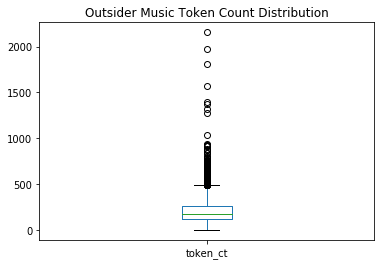

In [73]:
# Let's take a quick look at the token_ct distribution
# NOTE: This still includes non-English data
lyricsdf.token_ct.plot(kind = "box", rot=0, title = "Outsider Music Token Count Distribution")
plt.savefig('../images/outsider_token_count_dist.png')

There are some lyrics with around 2,000 tokens!  This seems unusual.  Let's investigate... could this be a tokenization issue?  Note that, on average, most songs are about 200 tokens long, which seems a bit more reasonable.

In [74]:
lyricsdf[lyricsdf.token_ct >= 2000]

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
1242,Jandek,One Last Chance,I need another chance I need one last chance I...,I need another chance\nI need one last chance\...,True,0.012782,"{'language': 'en', 'score': 0.9999974413418922}",en,"[i, need, another, chance, i, need, one, last,...",2155,325,0.150812


In [75]:
lyricsdf.loc[1242].lyrics

'I need another chance I need one last chance I’ve looked at myself I don’t like what I see I need another chance To try to do it right I can do it right If I have the strength If I keep my will If I direct my body I can do it right I need another chance Because I looked at myself And I’m goin wrong But I can do it right You can show me how Like you did before When I really needed to do it right I was in a fix before I was really in trouble It was sharp and quick It took me by surprise And you helped me then It was a matter of time But this time it’s different It’s been a growing thing It wasn’t sharp and quick No no no no It didn’t take me by surprise It came along slow and soft It crept and I saw it all along the way It came on bit by bit And I knew it all along The only difference is now It’s gone too far It’s gone too far It almost seems irreversible I need another chance I wanna do it right Cause when I looked at myself It was going all wrong I’ve got to change my style I’ve got t

This is actually pretty long.  (It's a 30-minute video on [YouTube](https://www.youtube.com/watch?v=nbn1Ei7Jfkc)!

In [76]:
lyricsdf.describe()

,percent_non_english,token_ct,type_ct,TTR
count,3101.000000,3101.000000,3101.000000,3101.000000
mean,0.011579,215.192519,80.191551,0.426618
std,0.011018,162.051047,47.952807,0.154090
min,0.000000,1.000000,1.000000,0.033708
25%,0.004306,119.000000,50.000000,0.321063
50%,0.009615,173.000000,70.000000,0.412214
75%,0.016129,267.000000,99.000000,0.504950
max,0.159120,2155.000000,464.000000,1.000000


In [77]:
lyricsdf.artist.describe()

count              3101
unique               62
top       Wesley Willis
freq                561
Name: artist, dtype: object

In [78]:
# 15 most frequent artists
lyricsdf.artist.value_counts()[:15]

Wesley Willis       561
Jandek              339
Daniel Johnston     313
Viper               261
Brian Wilson        223
John Frusciante     177
Ariel Pink          121
R. Stevie Moore     102
John Maus            93
Syd Barrett          91
Roky Erickson        80
IceJJFish            57
Gary Wilson          56
Wild Man Fischer     54
William Shatner      50
Name: artist, dtype: int64

In [79]:
# 15 least frequent artists
lyricsdf.artist.value_counts()[-15:]

Nervous Norvus               2
Leona Anderson               2
Ajdar                        2
David Cronenberg’s Wife      2
Legendary Stardust Cowboy    2
Bobby Jameson                2
Mrs. Miller                  1
Paul Hawkins                 1
Eilert pilarm                1
Lucia Pamela                 1
Harry Partch                 1
Damião Experiença            1
Varg Vikernes                1
Dr. Demento                  1
Sky Saxon                    1
Name: artist, dtype: int64

In [80]:
artists_to_plot = lyricsdf.artist.value_counts()[:15]
few_artist = lyricsdf.artist.value_counts()[15:]

sum = 0
for y in few_artist:
    sum = sum +y
artists_to_plot = artists_to_plot.append(pd.Series(sum))
artists_to_plot.rename(index={0:'Other'},inplace=True)

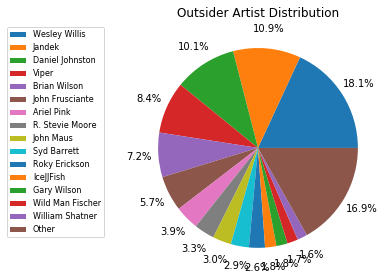

In [81]:
# Only shows the top 15 artists, as well as 48 "Other" artists grouped together
plt.pie(artists_to_plot, autopct='%1.1f%%', pctdistance = 1.2, labeldistance = 1.4)
plt.legend(artists_to_plot.index, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.title("Outsider Artist Distribution")
plt.savefig('../images/outsider_artist_dist_fig.png')
plt.tight_layout()
plt.show()


In [82]:
artists_to_plot

Wesley Willis       561
Jandek              339
Daniel Johnston     313
Viper               261
Brian Wilson        223
John Frusciante     177
Ariel Pink          121
R. Stevie Moore     102
John Maus            93
Syd Barrett          91
Roky Erickson        80
IceJJFish            57
Gary Wilson          56
Wild Man Fischer     54
William Shatner      50
Other               523
dtype: int64

In [83]:
lyricsdf.artist.describe()

count              3101
unique               62
top       Wesley Willis
freq                561
Name: artist, dtype: object

In [84]:
lyricsdf.lyrics.describe()

count                                                  3101
unique                                                 3035
top       Lean out your window, golden hair I heard you ...
freq                                                      3
Name: lyrics, dtype: object

After cleaning up the data, Wesley Willis is still at the top of the artist-count list, followed by 7 artists with song volumes of the same magnitude (in the 100s).  Note that Willis has more representation in this dataset (18.1%) than 47 of the least frequent artists (16.9%).

In total, there are 3,102 viable lyric entries left in the dataset after cleaning.  Of this, there are 62 unique artists, and 3,036 unique entries, indicating that there are potentially duplicate lyrics.  Let's investigate.

In [85]:
# It looks like there are some duplicate lyrics.  These should be removed for statistical analysis of lyrics.
lyricsdf[lyricsdf.lyrics.duplicated(keep=False)].head(8)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
177,Bobb Trimble,Premonitions Boy – The Reality,Premonitions are running wild ’cause you’re in...,Premonitions are running wild\n’cause you’re i...,True,0.015862,"{'language': 'en', 'score': 0.9999980378840578}",en,"[premonitions, are, running, wild, ’, cause, y...",335,84,0.250746
178,Bobb Trimble,Premonitions – The Fantasy,Premonitions are running wild ’cause you’re in...,Premonitions are running wild\n’cause you’re i...,True,0.015862,"{'language': 'en', 'score': 0.9999962447455848}",en,"[premonitions, are, running, wild, ’, cause, y...",335,84,0.250746
195,Brian Wilson,Barbara Ann,Ba ba ba ba Barbara Ann Ba ba ba ba Barbara An...,Ba ba ba ba Barbara Ann\nBa ba ba ba Barbara A...,True,0.022901,"{'language': 'id', 'score': 0.9999956304631636}",id,"[ba, ba, ba, ba, barbara, ann, ba, ba, ba, ba,...",293,43,0.146758
196,Brian Wilson,Barbara Anne,Ba ba ba ba Barbara Ann Ba ba ba ba Barbara An...,Ba ba ba ba Barbara Ann\nBa ba ba ba Barbara A...,True,0.022901,"{'language': 'id', 'score': 0.8571382073969779}",id,"[ba, ba, ba, ba, barbara, ann, ba, ba, ba, ba,...",293,43,0.146758
214,Brian Wilson,Cinco De Mayo,"Down on Olivera Street, a Mexicano cry A grito...","Down on Olivera Street, a Mexicano cry\nA grit...",True,0.005000,"{'language': 'en', 'score': 0.9999964832156113}",en,"[down, on, olivera, street, ,, a, mexicano, cr...",87,64,0.735632
215,Brian Wilson,Cinco De Mayo (Narrative),"Down on Olivera Street, a Mexicano cry A grito...","Down on Olivera Street, a Mexicano cry\nA grit...",True,0.005000,"{'language': 'en', 'score': 0.9999966550329608}",en,"[down, on, olivera, street, ,, a, mexicano, cr...",87,64,0.735632
293,Brian Wilson,Little Children,On a Monday mornin’ you see ’em all there (Lit...,On a Monday mornin’ you see ’em all there\n(Li...,True,0.015717,"{'language': 'en', 'score': 0.9999953936182528}",en,"[on, a, monday, mornin, ’, you, see, ’, em, al...",222,77,0.346847
294,Brian Wilson,Little Children (demo),On a Monday mornin’ you see ’em all there (Lit...,On a Monday mornin’ you see ’em all there\n(Li...,True,0.015717,"{'language': 'en', 'score': 0.9999983171443989}",en,"[on, a, monday, mornin, ’, you, see, ’, em, al...",222,77,0.346847


It looks like some lyrics are repeated, but under different titles.  Originally, the code above was indicative of a data cleaning issue: by replacing empty strings ("") with `None`, I had accidentally somehow duplicated the lyrics above the song into the empty string.  This meant that there were no `None`s *and* no remaining empty strings, so up until this point, it was difficult to identify the problem.  I went back and removed the code that replaced these empty strings and will instead filter out the empty string lyrics themselves.

In [86]:
# But there are no duplicates of the exact same song.
lyricsdf[lyricsdf.duplicated(subset=['title', 'lyrics'], keep=False)]

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR


We looked at one song so far with some of the longest lyrics; what are some with the shortest?

In [87]:
shortest = lyricsdf[lyricsdf.token_ct < 20]
shortest.sort_values('token_ct').head(10)

,artist,title,lyrics,lyrics_lines,eng_chars_only,percent_non_english,lang_detect,lang,tokens,token_ct,type_ct,TTR
57,Ariel Pink,El Fantastic Summer Part,Yeah,Yeah,True,0.0,"{'language': 'tr', 'score': 0.8571389399551828}",tr,[yeah],1,1,1.000000
2452,Viper,Cocaine,Cocaine,Cocaine,True,0.0,"{'language': 'fr', 'score': 0.9999943253160811}",fr,[cocaine],1,1,1.000000
314,Brian Wilson,Metal Beach,Metal beach,Metal beach,True,0.0,"{'language': 'en', 'score': 0.7142827791481443}",en,"[metal, beach]",2,2,1.000000
147,Ariel Pink,Starry Eyes,​raw ot oG,​raw ot oG,False,0.1,"{'language': 'pl', 'score': 0.8571418016348404}",pl,"[​raw, ot, og]",3,3,1.000000
1353,Jandek,You,You can feel...,You can feel...,True,0.0,"{'language': 'ca', 'score': 0.42857108873573}",ca,"[you, can, feel, ...]",4,4,1.000000
2272,The Red Krayola,Listen to This,Listen to this!,Listen to this!\n,True,0.0,"{'language': 'en', 'score': 0.9999968655543193}",en,"[listen, to, this, !]",4,4,1.000000
2528,Viper,InTheBack,Needs to be transcribed,Needs to be transcribed,True,0.0,"{'language': 'en', 'score': 0.8571399451256713}",en,"[needs, to, be, transcribed]",4,4,1.000000
2456,Viper,Crakkkk,Ahahhaah u dunevn smoke crakk,Ahahhaah u dunevn smoke crakk,True,0.0,"{'language': 'id', 'score': 0.4285715521126329}",id,"[ahahhaah, u, dunevn, smoke, crakk]",5,5,1.000000
1241,Jandek,Oh No,"Ooh Oh no, oh no","Ooh\nOh no, oh no",True,0.0,"{'language': 'sk', 'score': 0.8265520572079647}",sk,"[ooh, oh, no, ,, oh, no]",6,4,0.666667
208,Brian Wilson,Can’t Wait Too Long,Been too long Been too long,Been too long\nBeen too long,True,0.0,"{'language': 'nl', 'score': 0.857139050180524}",nl,"[been, too, long, been, too, long]",6,3,0.500000


"Needs to be transcribed" is likely not a lyric and was missed during data cleaning--however, I'm sensing that, since this example and a few others I have encountered through data sampling don't follow the exact format as previous "transcription"-centered comments, it will be difficult to identify and remove all comments like this.

Furthermore, note that spaCy's language detector identified many of these shorter lyrical entries as non-English languages.  It's additionally interesting to note that many of these lyrics are identical to the titles, bringing up a question: are these mistakes from the Genius API pulling titles from empty lyric pages, or are these really just the lyrics of the song?  These can't be answered by further linguistic analysis but are rather just questions about the dataset.  In the case that anyone would like to replicate my methods of pulling and cleaning the data, this is something to keep in mind.

In [88]:
# The most common words in this dataset
from collections import Counter
outtoks = []

for toks in lyricsdf.tokens:
    outtoks.extend(toks)

outfreq = Counter(outtoks)
print(outfreq.most_common(20))

[('’', 33748), ('i', 25506), (',', 24260), ('the', 23877), ('you', 18573), ('a', 13446), ('and', 11878), ('to', 11611), ('s', 9768), ('it', 9514), ('me', 8931), ('my', 8541), ('in', 7396), ('t', 6646), ('of', 5641), ('that', 5491), ('on', 5125), ('m', 4951), ('your', 4242), ('is', 4032)]


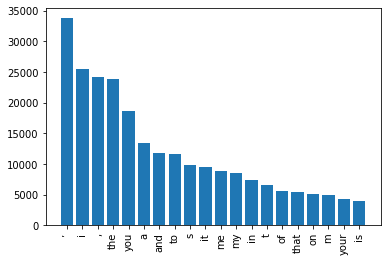

In [89]:
word = []
count = []
for (w, c) in outfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.savefig("../images/out_most_common_words")
plt.show()

Unsurprisingly (or maybe surprisingly, given the nature of the data so far), the most common words in the dataset are pronouns, contractions, and other functional items or punctuation.  Let's try to look at the most common words that aren't stopwords ([source](https://stackoverflow.com/questions/31826950/dropping-specific-words-out-of-an-nltk-distribution-beyond-stopwords)).

In [90]:
# If we remove stopwords and punctuation, what do we get?
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['’', ',', '?', '!', '(', ')', '[', ']', '.', "'", '"',])   # also remove punctuation
filtered_outfreq = dict((word, freq) for word, freq in outfreq.items() if word not in (stopwords))
print(nltk.FreqDist(filtered_outfreq).most_common(20))

[('got', 3048), ('like', 2832), ('know', 2748), ('love', 2713), ('rock', 2396), ('go', 1964), ('na', 1960), ('time', 1870), ('get', 1856), ('oh', 1809), ('see', 1773), ('one', 1647), ('let', 1495), ('never', 1411), ('cause', 1335), ('ass', 1314), ('way', 1302), ('yeah', 1240), ('life', 1196), ('baby', 1195)]


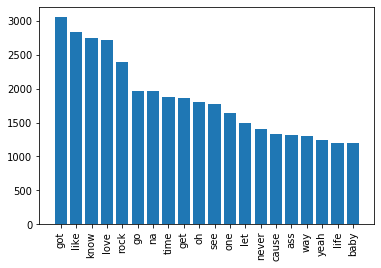

In [91]:
word = []
count = []
for (w, c) in nltk.FreqDist(filtered_outfreq).most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.savefig("../images/out_most_common_words_nostops")
plt.show()

Now these are some more interesting words!  I wonder how they'll play out against the "insider" music dataset--the Billboard Hot 100 corpus.

## Billboard Hot 100 Corpus
I'll be using Kaylin Pavlik's dataset from her ["50 Years of Pop Music"](https://www.kaylinpavlik.com/50-years-of-pop-music/) project as a means of comparison for the present outsider music dataset.  It should be noted that Pavlik's dataset contains the most popular music over a span of 5 decades, and so it is not perfectly comparable to the outsider music dataset, which does not contain information on temporal stratification or genre.

In [92]:
# load in the lyrics dataset
popdf = pd.read_csv("../data/billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")
popdf.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [93]:
popdf.shape

(5100, 6)

Note that there are also about 2000 more data points in Pavlik's dataset. This dataset labels instrumental songs as such in the lyrics, but the outsider music dataset showed no lyrics for songs like this.  For consistency, I will remove the "instrumental" strings from the Lyrics column, along with the float `np.nan` values.

In [96]:
popdf.Lyrics = popdf.Lyrics.replace({np.nan: "", "instrumental":"", None:""})
popdf.Lyrics = popdf.Lyrics.astype(str)

popdf.iloc[2].Lyrics  # note that this is multiple spaces

'  '

In [97]:
# Reduce multiple spaces to an empty string
popdf.Lyrics = popdf.Lyrics.map(lambda x: x.strip())

In [98]:
# Now it's just an empty string instead of 2 spaces!
popdf.iloc[2].Lyrics

''

In [99]:
popdf.rename(columns={"Song":"title", "Artist":"artist", "Lyrics":"lyrics"}, inplace=True)
popdf = popdf[["title", "artist", "lyrics"]]
popdf.head()

,title,artist,lyrics
0,wooly bully,sam the sham and the pharaohs,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,four tops,sugar pie honey bunch you know that i love you...
2,i cant get no satisfaction,the rolling stones,
3,you were on my mind,we five,when i woke up this morning you were on my min...
4,youve lost that lovin feelin,the righteous brothers,you never close your eyes anymore when i kiss ...


In [103]:
popdf.iloc[66].lyrics

'i dont know much about my history now dont know much about biology dont know much about the science book now dont know much about the french i tookall i do know is i love you now and i wonder if you love me too ooh what a wonderful world this could beooh i dont know much about geography now dont know much about trigonometry now dont know much about the algebra dont know what a slide rule is forbut i do know one and one is two now and i wonder if you love me too ooh what a wonderful world this could bei dont claim to be an a student but thats what im trying to be but by being an a student baby look like i could win your love for medont know much about the history now oh now dont know much about biology i dont know much about the science book now dont know much about the good french i took ohall i do know is i love you now oh now and i wonder if you love me too ooh what a wonderful world this could begood lord i dont claim to be an a student but thats what im trying to be oh now but if 

Note that this dataset isn't perfect either -- many words have been concatenated, likely because newlines were cut out, rather than replaced with spaces.  Because of this, words like "beooh," "tookall," "forbut," "bei," and "begood" will each be considered as single tokens.  However, in the interest of saving time and using existing resources, we'll assume that the frequencies of these words will be low enough to effect the ensuing analysis only minimally!

In [104]:
# tokenize
popdf["tokens"] = popdf.lyrics.map(lambda x: nltk.word_tokenize(x))
popdf.tokens = popdf.tokens.map(lambda x: [word.lower() for word in x])
popdf.head()

,title,artist,lyrics,tokens
0,wooly bully,sam the sham and the pharaohs,sam the sham miscellaneous wooly bully wooly b...,"[sam, the, sham, miscellaneous, wooly, bully, ..."
1,i cant help myself sugar pie honey bunch,four tops,sugar pie honey bunch you know that i love you...,"[sugar, pie, honey, bunch, you, know, that, i,..."
2,i cant get no satisfaction,the rolling stones,,[]
3,you were on my mind,we five,when i woke up this morning you were on my min...,"[when, i, woke, up, this, morning, you, were, ..."
4,youve lost that lovin feelin,the righteous brothers,you never close your eyes anymore when i kiss ...,"[you, never, close, your, eyes, anymore, when,..."


In [105]:
popdf["token_ct"] = popdf.tokens.map(len)
popdf["type_ct"] = popdf.tokens.map(lambda x: len(set(x)))
popdf["TTR"] = popdf.type_ct / popdf.token_ct
popdf.head()

,title,artist,lyrics,tokens,token_ct,type_ct,TTR
0,wooly bully,sam the sham and the pharaohs,sam the sham miscellaneous wooly bully wooly b...,"[sam, the, sham, miscellaneous, wooly, bully, ...",125,64,0.512000
1,i cant help myself sugar pie honey bunch,four tops,sugar pie honey bunch you know that i love you...,"[sugar, pie, honey, bunch, you, know, that, i,...",205,94,0.458537
2,i cant get no satisfaction,the rolling stones,,[],0,0,NaN
3,you were on my mind,we five,when i woke up this morning you were on my min...,"[when, i, woke, up, this, morning, you, were, ...",152,44,0.289474
4,youve lost that lovin feelin,the righteous brothers,you never close your eyes anymore when i kiss ...,"[you, never, close, your, eyes, anymore, when,...",232,88,0.379310


In [106]:
popdf.describe()

,token_ct,type_ct,TTR
count,5100.000000,5100.000000,4851.000000
mean,316.646471,107.972353,0.367281
std,181.255214,58.376938,0.112131
min,0.000000,0.000000,0.053571
25%,204.000000,77.000000,0.293406
50%,285.000000,98.000000,0.353791
75%,399.000000,127.000000,0.427735
max,1158.000000,434.000000,1.000000


In [109]:
# save full dataset to different object in case it's needed later
popdf_orig = popdf

# drop empty/null lyrics, and instrumental lyrics
popdf = popdf[~popdf.lyrics.isin(['', 'instrumental', 'NA'])]
popdf.describe()

,token_ct,type_ct,TTR
count,4831.000000,4831.000000,4831.000000
mean,334.273856,113.980335,0.364661
std,169.678791,53.973813,0.104694
min,5.000000,3.000000,0.053571
25%,217.000000,81.000000,0.293062
50%,294.000000,101.000000,0.353135
75%,408.000000,130.000000,0.426829
max,1158.000000,434.000000,1.000000


In [111]:
popdf = popdf[~popdf.lyrics.duplicated()]

In [114]:
popdf.describe()

,token_ct,type_ct,TTR
count,4627.000000,4627.000000,4627.000000
mean,330.694402,113.308839,0.366537
std,168.976506,53.851214,0.105183
min,5.000000,3.000000,0.053571
25%,214.000000,80.000000,0.294569
50%,291.000000,100.000000,0.354949
75%,403.000000,129.000000,0.429320
max,1158.000000,434.000000,1.000000


In [137]:
popdf.artist.describe()

count        4627
unique       2335
top       madonna
freq           33
Name: artist, dtype: object

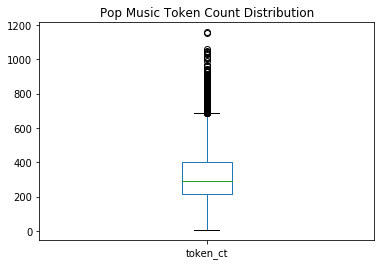

In [115]:
popdf.token_ct.plot(kind = "box", rot=0, title = "Pop Music Token Count Distribution")
plt.savefig('../images/pop_token_count_dist.png')

There are still some pretty long lyrics here, but the maximum token count is still nearly half that of the outsider music.  The distribution here seems to be a little more normal.  While the outside music had a great wealth of data crammed around the mean token count of 215.  Here, the mean is a little higher, at about 333 tokens per song (and potentially more, given that some words are concatenated mistakenly) and the spread is more consistent.

In [116]:
popdf.artist.describe()

count        4627
unique       2335
top       madonna
freq           33
Name: artist, dtype: object

This dataset has 2,340 unique artists (compared to our measly 62 artists in the outsider dataset).

In [117]:
popdf.artist.value_counts()

madonna                       33
elton john                    25
michael jackson               22
mariah carey                  21
stevie wonder                 20
                              ..
flo rida featuring william     1
john schneider                 1
amazing rhythm aces            1
madness                        1
dj snake and lil jon           1
Name: artist, Length: 2335, dtype: int64

And note that this dataset is also less skewed toward any particular artist; Madonna, who is most represented in Pavlik's Billboard data, only has 34 songs total.

In [118]:
pop_artists_to_plot = popdf.artist.value_counts()[:15]
pop_few_artist = popdf.artist.value_counts()[15:]

sum = 0
for y in pop_few_artist:
    sum = sum +y
pop_artists_to_plot = pop_artists_to_plot.append(pd.Series(sum))
pop_artists_to_plot.rename(index={0:'Other'},inplace=True)

In [119]:
sum / len(popdf)

0.939917873352064

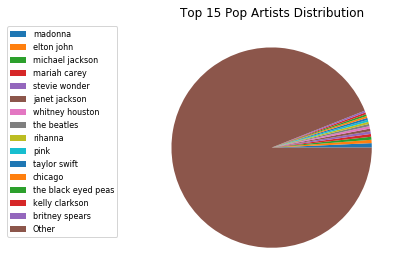

In [120]:
# Only shows the top 15 artists to be comparable to the outsider music chart
plt.pie(pop_artists_to_plot)
plt.title("Top 15 Pop Artists Distribution")
plt.legend(pop_artists_to_plot.index, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.tight_layout()
plt.savefig('../images/pop_artist_dist_fig.png')
plt.show()

This chart isn't a wonderfully informative visualization on its own, but in contrast to the outsider music dataset, you can see that the distribution is much less skewed toward any one artist.  The brown section, representing artists beyond the top-15, is 93.8% of the data.  Below, I will visualize again, but using a number of top artists proportional to the number of artists in Pavlik's dataset.

In [121]:
proportion = 15/len(lyricsdf.artist.unique())
size = proportion * len(popdf.artist.unique())
size

564.9193548387098

In [122]:
pop_artists_to_plot = popdf.artist.value_counts()[:566]
pop_few_artist = popdf.artist.value_counts()[566:]

sum = 0
for y in pop_few_artist:
    sum = sum +y
pop_artists_to_plot = pop_artists_to_plot.append(pd.Series(sum))
pop_artists_to_plot.rename(index={0:'Other'},inplace=True)

In [123]:
sum / len(popdf)

0.41711692241193

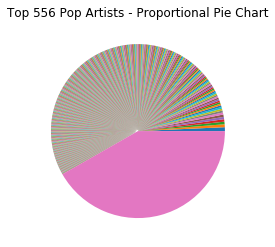

In [124]:
# Shows the top 556 artists to be comparable *proportionally* to the outsider music chart
plt.pie(pop_artists_to_plot)
plt.title("Top 556 Pop Artists - Proportional Pie Chart")
plt.savefig('../images/pop_proportional_artist_dist_fig.png')
plt.show()

Once again, alone, this chart is extremely unreadable, but it should be viewed contrastively to understand that, while the outsider music's "Other" artist category (about 76% of the artists) took up only 16.9% of the total lyrics dataset, the Billboard Pop Music dataset has 41.5% of its data in this "Other" category.

It should be clear by now, then, that a major issue with the outsider music dataset will be its representativeness, or generalizability.  Given the nature of the outsider music dataset (and given enough time), it would be interesting to analyze the outsider music dataset split between Wesley Willis songs alone and the full dataset without Willis's music. This could give some insight into how much Wesley Willis influences the overall dataset, as well as show whether the conventional understanding of outsider music is attrubutable mostly to Wesley Willis, if it does not hold true for both parts of the full dataset.

But FIRST: let's analyze the most common words in the pop dataset.

In [125]:
# most common words in the pop dataset
poptoks = []

for toks in popdf.tokens:
    poptoks.extend(toks)

popfreq = Counter(poptoks)
print(popfreq.most_common(20))

[('you', 61169), ('i', 53492), ('the', 50769), ('to', 33997), ('and', 30831), ('me', 30105), ('a', 27758), ('it', 24194), ('my', 21436), ('in', 17595), ('that', 15130), ('on', 15084), ('your', 14731), ('love', 14478), ('im', 13585), ('be', 12296), ('of', 12241), ('all', 11256), ('dont', 11031), ('know', 10643)]


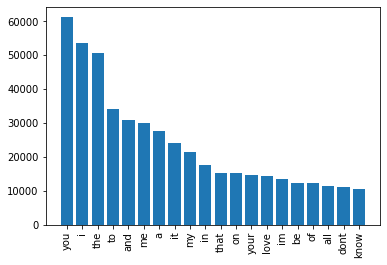

In [126]:
word = []
count = []
for (w, c) in popfreq.most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.savefig("../images/pop_most_common_words")
plt.show()

In [127]:
# If we remove stopwords and punctuation, what do we get?
stopwords = nltk.corpus.stopwords.words('english')
# also remove punctuation, though it doesn't seem present here
stopwords.extend(['’', ',', '?', '!', '(', ')', '[', ']', '.', "'", '"',]) 
filtered_popfreq = dict((word, freq) for word, freq in popfreq.items() if word not in (stopwords))
print(nltk.FreqDist(filtered_popfreq).most_common(20))

[('love', 14478), ('im', 13585), ('dont', 11031), ('know', 10643), ('na', 10456), ('like', 10185), ('got', 9653), ('oh', 9093), ('baby', 8647), ('get', 7748), ('youre', 6212), ('yeah', 5957), ('want', 5859), ('go', 5769), ('make', 5162), ('one', 5125), ('cant', 5096), ('see', 4964), ('gon', 4960), ('time', 4958)]


In [128]:
# If we remove stopwords and punctuation, what do we get?

stopwords = nltk.corpus.stopwords.words('english')
# alter  stopwords so that it will catch "dont", "cant", etc.
stopwords = [x.replace("'", "") for x in stopwords]
filtered_popfreq = dict((word, freq) for word, freq in popfreq.items() if word not in (stopwords))
print(nltk.FreqDist(filtered_popfreq).most_common(20))

[('love', 14478), ('im', 13585), ('know', 10643), ('na', 10456), ('like', 10185), ('got', 9653), ('oh', 9093), ('baby', 8647), ('get', 7748), ('yeah', 5957), ('want', 5859), ('go', 5769), ('make', 5162), ('one', 5125), ('cant', 5096), ('see', 4964), ('gon', 4960), ('time', 4958), ('come', 4673), ('let', 4632)]


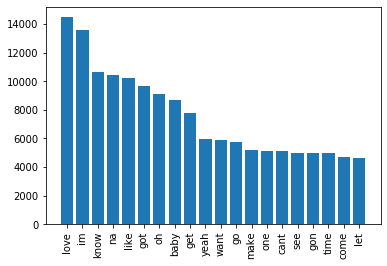

In [129]:
word = []
count = []
for (w, c) in nltk.FreqDist(filtered_popfreq).most_common(20):
    word.append(w)
    count.append(c)
plt.bar(word, count)
plt.xticks(rotation = 90)
plt.savefig("../images/pop_most_common_words_nostops")
plt.show()

Seeing words like "im," "dont," "youre," and "cant" pop up in the first non-stopwords analysis is a bit tell-tale that Pavlik's dataset has been cleaned very differently from the outsider music dataset.  Just removing the apostrophes in the stopwords list isn't enough either, since stopwords expects that the data is tokenized to split contractions (e.g., "i", "'", "m", for "I'm")

It may be worthwhile to reformat my own data to match this schema so that the data will be readily comparable.  Since I wanted to try some sort of classifier, I'd prefer if formatting differences between the datasets wasnt a factor that would tip off a Naive Bayes Algorithm.  I would like to analyze the *lyrics*, not data cleaning processes.

In the meantime, I will let it go just to make headway into the classifier code, but I'm strongly considering altering my dataset to remove apostrophes.

## The Big 3:
**Wesley Willis, Jandek, and Daniel Johnston**

In [130]:
def top3(x):
    if x in ["Wesley Willis", "Jandek", "Daniel Johnston"]:
        return "top 3"
    else:
        return "other"
    
lyricsdf["top3"] = lyricsdf.artist.map(lambda x: top3(x))

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


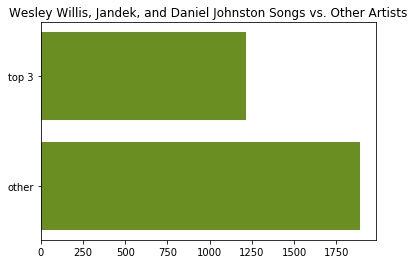

In [131]:
plt.barh(lyricsdf.top3.unique(), lyricsdf.top3.value_counts(), color = "olivedrab")
plt.title("Wesley Willis, Jandek, and Daniel Johnston Songs vs. Other Artists")
plt.savefig("../images/top3_vs_other_artists_distribution")
plt.show()

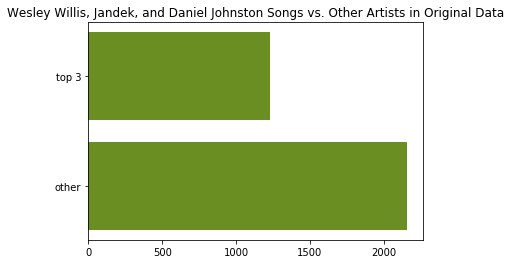

In [132]:
# In the original data (including null & obviously non-English items)
lyricsdf_orig["top3"] = lyricsdf_orig.artist.map(lambda x: top3(x))
plt.barh(lyricsdf_orig.top3.unique(), lyricsdf_orig.top3.value_counts(), color = "olivedrab")
plt.title("Wesley Willis, Jandek, and Daniel Johnston Songs vs. Other Artists in Original Data")
plt.show()